# A two agents model of inequalities.

Business Cycles and Fluctuations - AE2E6

> **Modfiles**

Uncomment the following lines to install needed packages (if not already
present).

In [1]:
# uncomment the next lines, the first time you run
# import Pkg; Pkg.add(["DBnomics", "Dynare", "DataFrames"])

## Preference for wealth and marginal propensity to consume

For now, we consider a single representative agent. She has the ability
to buy a two periods bond, yielding 1 after one period. The price of the
bond at any date is $q$, hence its (riskfree) interest rate is $r=1/q$.

Agent values consumption $c_t$ and wealth $b_t q_t$ so that she
maximizes[1]:

$$\max \sum_t \beta^t \left( \frac{c_t^{1-\frac{1}{\sigma}}}{1-\frac{1}{\sigma}}+ \varphi \frac{ (1+b_t)^{1-\frac{1}{\eta}} } {1-\frac{1}{\eta}} \right)$$

under the budget constraint

$$c_t = y_t + b_{t-1} - b_t q_t$$

where $y_t$ is exogenous income following AR1

$$(y_t-\overline{y})=\rho (y_{t-1}-\overline{y}) + \epsilon^y_t$$

[1] this is the “preference for wealth” specification

In [1]:
using Dynare

1.  **Write down the optimality condition for debt holdings.**

> **Correction**
>
> We get:
>
> $$q_t = \beta \left(\frac{c_{t+1}}{c_{t}}\right)^{-\frac{1}{\sigma}}+\varphi \left(\frac{1 + b_t q_t}{c_{t}}\right)^{-\frac{1}{\sigma}}$$

**What are the equations defining the deterministic equilibrium?**

> **Correction**
>
> At the equilibium, the last equation becomes.
> $$q = \beta + \varphi \left(\frac{1 + b q}{c}\right)^{-\frac{1}{\sigma}}$$

**3. Inspect and run `one_agent.mod` model. Show that there is a unit
root. Can you interpret it?**

> **Correction**
>
> The `one_agent.mod` model is a standard consumption saving model
> without preference for wealth.
>
> In general, if the solution of a model is $y_t = A y_{t-1}$ where
> $y_t$ is the vector of variables, we have a unit root when one of the
> eigenvalues of A is equal to 1 in absolute terms.
>
> In the specific case of the modfile, we can directly read the values
> of matrix $A$ are given in the output of dynare (precisely it is a
> subset of $A'$)
>
>       Coefficients of approximate solution function (reduced form)
>
>     ───────┬──────────────────
>            │ y_t   c_t    b_t
>     ──────────────────────────
>       ϕ(b) │ 0.0  0.0385  1.0
>      e_y_t │ 0.1  0.0038  0.1
>     ───────┴──────────────────
>
> The rows correspond to the (predetermined) states. Non predetermined
> variables do not appear as rows (or equivalently with zeros
> everywhere).
>
> Here we see that $b_t$ is the only endogenous state. We also see that
> its dynamic is given by:
>
> $$b_t = 1.0 b_{t-1} + 0.1 e_{y,t}$$
>
> In other words, the dynamic of $b$ is an AR1 with perfect persistence.
>
> This behaviour (like in an open economy) comes from the fact that any
> steady-state level of debt is feasible (in a deterministic model).
> Hence shocks can affect the steady-state permanently.

In [4]:
@dynare("one_agent.mod");

Dynare version: 0.9.11
2024-05-16T15:39:08.946: Starting @dynare one_agent.mod
["one_agent.mod", "language=julia", "json=compute"]
Dynare preprocessor version: 6.4.0+0
2024-05-16T15:39:08.950: End of preprocessing
2024-05-16T15:39:08.953: Start parse_statements!
  Steady state

───┬─────
 y │ 1.0
 c │ 1.0
 b │ 0.0
───┴─────

  Coefficients of approximate solution function (reduced form)

───────┬──────────────────
       │ y_t   c_t    b_t
──────────────────────────
  ϕ(b) │ 0.0  0.0385  1.0
 e_y_t │ 0.1  0.0038  0.1
───────┴──────────────────

  Note: ϕ(x) = x_{t-1} - steady_state(x)

  THEORETICAL MOMENTS

──────────┬───────────────────────────
 VARIABLE │ MEAN  STD. DEV.  VARIANCE
──────────────────────────────────────
        y │  1.0      0.001       0.0
        c │  NaN        NaN       NaN
        b │  NaN        NaN       NaN
──────────┴───────────────────────────

  VARIANCE DECOMPOSITION (in percent)

──────────┬─────
 VARIABLE │ e_y
────────────────
        y │ 1.0
─────────

Starting preprocessing of the model file ...
Found 3 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Normalization failed with cutoff, trying symbolic normalization...
Could not normalize the static model. Variable b is not in the maximum cardinality matching.
Computing dynamic model derivatives (order 1).
Normalizing the dynamic model...
Finding the optimal block decomposition of the dynamic model...
3 block(s) found:
  3 recursive block(s) and 0 simultaneous block(s).
  the largest simultaneous block has 0 equation(s)
                                 and 0 feedback variable(s).
JSON written after Computing step.
Preprocessing completed.












1.  **What is the consumption response to a temporary income shock? To a
    permanent one? (with autocorrelation $\rho=0.9$ and $\rho=1.0$)**

> **Correction**
>
> Change the income equation:
>
> -   for a temporary shock remove the zero to get: `y = ybar + e_y`
> -   For a persistent one, define a new parameter in the parameters
>     line initialized to `rho=0.9` and change the equation to
>     `y - ybar = rho*(y(-1) - ybar) + e_y`. In the case `rho=1.0` note
>     the apparition of a second unit root.
>
> In the simulations, pay attention to the magnitude of the shock `e_y`
> (1% by default) to compare it to the magnitude of the response for
> assets `b`.
>
> In all simulations, the persistent effect of the shock on the level of
> debt comes from the presence of a unit root.

1.  **In the modfile, add a preference for wealth term in the utility
    function and adjust the calibration of `beta` accordingly.**

> **Correction**
>
> Parameters `phi` and `eta` are already predefined.
>
> Add `+ phi*(1+b*q)^(-1/eta)/(c^(-1/sigma))` to the Euler equation and
> `beta = 1/r - phi*(1+bbar*q)^(-1/eta)/(cbar^(-1/sigma));` in the
> definition of parameters
>
> The simulation runs, only when the command `check` succeeds, in
> particular, when the steady-sate is satisfied. If it is not the case,
> you need to adjust the equations/calibration.
>
> Result is in the `one_agent_2.mod` file.
>
> Here we see that one unit root has disappeared, because pref. for
> wealth pins down equilibrium asset holdings.

**6. Simulate the response to a temporary and a persistent shock. Given
`phi` what is the effect of `eta`?**

> **Correction**
>
> Now the savings response to transitory shock is mean reverting, while
> the response to a persistent shock is persistent and even increasing
> over time.
>
> `eta` affects the long run savings level in response to a temporary
> income shock. (If curious you should be able to check it does not
> depend on phi).

## A two agents model

We now assume there are two agents: bottom and top earners. Top earners
amount for a fraction $\chi$ of the total population. Together they earn
a fraction $z\in[0,1]$ of the total production $y$ which is an AR1
process as in the first part. The rest goes to the bottom earners.

Top earners can save by lending to bottom earners. We denote by $B_t$
the total quantity of riskfree bonds, traded at $q_t$. Note that debt
per capita is $\frac{B_t}{\chi}$ for top earners and
$\frac{B_t}{1-\chi}$ for bottom earners. Top earners have preference for
wealth as in the first part, while bottom earners have standard
preferences (with $\varphi=0$)

1.  **Write down the budget equations for both agents. What are the new
    Euler equations? Check that it is consistent with the
    `two_agents.mod` modfile. What are the per capita variables?**

> **Correction**
>
> Budget constraints are included in the modfile.
>
> Per capita variables: `c_t`, `c_b`, `b_t` and `b_b`.

1.  **What is qualitatively the effect of a permanent redistributive
    shock? (simulate the model)**

> **Correction**
>
> With increased income, top earners want to increase their asset
> holdings. This will happen since bottom earners are indifferent in the
> steady-state. During the transition however, we see a decrease in the
> interest rate (to convince borrower to accept a decreasing path of
> consumption over time).
>
> <figure>
> 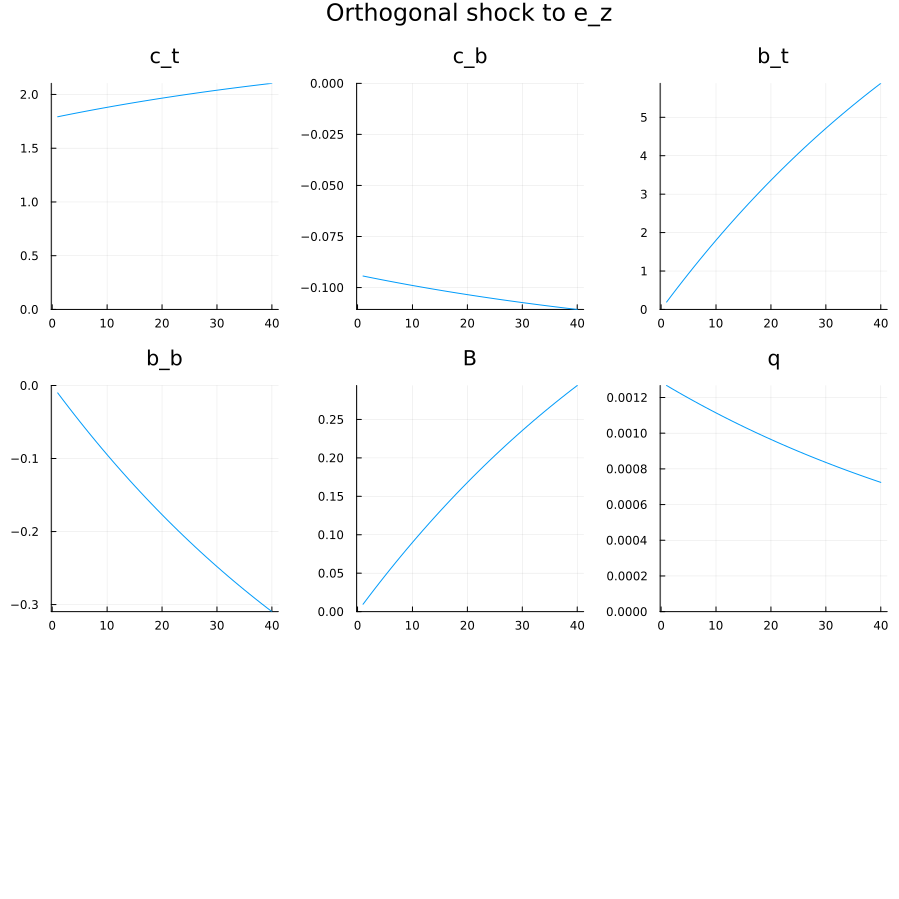 alt="Response to a redistributive shock" />
> <figcaption aria-hidden="true">Response to a redistributive
> shock</figcaption>
> </figure>

In [11]:
@dynare("two_agents.mod");

Dynare version: 0.9.11
2024-05-16T16:04:04.483: Starting @dynare two_agents.mod
["two_agents.mod", "language=julia", "json=compute"]
Dynare preprocessor version: 6.4.0+0
2024-05-16T16:04:04.488: End of preprocessing
2024-05-16T16:04:04.493: Start parse_statements!
  Coefficients of approximate solution function (reduced form)

────────┬─────────────────────────────────────────────────────────────────────────
        │ y_t   z_t   c_t_t    c_b_t    b_t_t    b_b_t     B_t       q_t      r_t
──────────────────────────────────────────────────────────────────────────────────
   ϕ(y) │  0.9  0.0   2.4446   0.8187   -2.4617  0.1296  -0.1231  0.1745  -0.1887
   ϕ(z) │  0.0  1.0  17.9241  -0.9434    1.9191  -0.101    0.096  0.0127  -0.0137
 ϕ(b_t) │ -0.0  0.0   0.1658   0.0439   -0.9495    0.05  -0.0475   0.096  -0.1038
 ϕ(b_b) │ -0.0  0.0   2.1269   0.8881  -36.7706  1.9353  -1.8385  1.8258  -1.9748
  e_y_t │  1.0  0.0   2.7162   0.9097   -2.7352   0.144  -0.1368  0.1938  -0.2097
  e_z_t │ -0.

Starting preprocessing of the model file ...
Found 9 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Finding the optimal block decomposition of the static model...
6 block(s) found:
  5 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 2 equation(s)
                                 and 2 feedback variable(s).
Computing dynamic model derivatives (order 1).
Normalizing the dynamic model...
Finding the optimal block decomposition of the dynamic model...
3 block(s) found:
  2 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 6 equation(s)
                                 and 6 feedback variable(s).
JSON written after Computing step.
Preprocessing completed.












## Calibrating and simulating the model

The model in the modefile is pre-calibrated to match US data in 1983.
Assume the model is in equilibrium for an initial level of debt $B=0.91$
(which is the debt/gdp ratio in the us in 1983).

Taking $\varphi=0.05$ as constant, for any given choice of $\eta$, there
is a unique value of $\beta$ consistent with the equilibrium as in the
one agent case.

Now we would like to calibrate the value of $\eta$ so as to match the
marginal propensity to save of top earners which was approximately 50%
in 1983.

Since the two agents model is already calibrated for most variables, we
reuse it rather than adapting the one agent model.

1.  **In the model `two_agents.mod` replace the Euler equation of bottom
    earner by `q = 1/rbar`. Justify why, from the top earners
    perspective, the model is now equivalent to a single agent model.**

> **Correction**
>
> Interest rate is the only manifestation of bottom earners preferences
> in the model. If we set it equal to a constant, top earners are now
> facing an infinitely elastic demand of bonds as in the one agent case.

**@. Use the modified model to compute the marginal propensity out of a
permanent income shock after 6 periods. Choose parameter `eta` so that
this m.p.s. is approximatively 50%.**

> **Correction**
>
> Several options here. We can just make a persistent shock of size
> sig_z to the overall income $y$ and compute the marginal propensity to
> save at different periods (variable mps). It must be normalized by the
> initial income level of top earners. We can then run computations for
> different values of $eta$ until we find the desired value.
>
> Modified model is `two_agents_mps.mps`. I found eta=0.6 to be a good
> calibration.

In [ ]:
@dynare("two_agents_mps.mps")

1.  **What is the effect of a 10% permanent increase in inequalities?
    Over 30 years and in the long run?**

> **Correction**
>
> Several options here. We can just make a persistent shock of size
> sig_z to the overall income $y$ and compute the marginal propensity to
> save at different periods (variable mps). It must be normalized by the
> initial income level of top earners. We can then run computations for
> different values of $eta$ until we find the desired value.
>
> Modified model is `two_agents_mps.mps`. I found eta=0.6 to be a good
> calibration.